<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab2/B25_E22CSEU0743_PRASHANT_CHAUHAN/CV_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name-Prashant Chauhan
Enroll.No- E22CSEU0743
LAB NO-03

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/content/picture1.jpg')


In [6]:
type(image)

numpy.ndarray

In [7]:
print(image.shape)

(427, 640, 3)


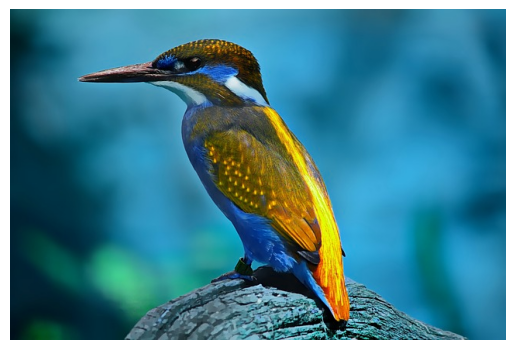

In [8]:
plt.axis('off')
plt.imshow(image)

In [10]:
rgb_img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [13]:
print(rgb_img.shape)

(427, 640, 3)


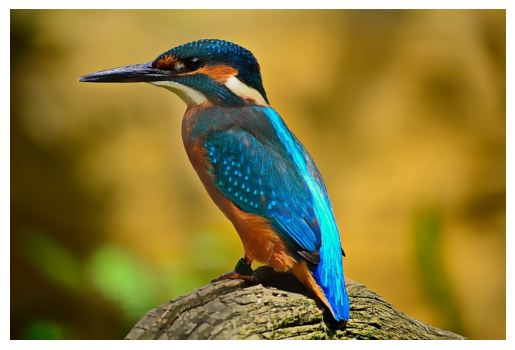

In [14]:
plt.axis('off')
plt.imshow(rgb_img)

In [20]:
gray_img=cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY)

In [21]:
print(gray_img.shape)

(427, 640)


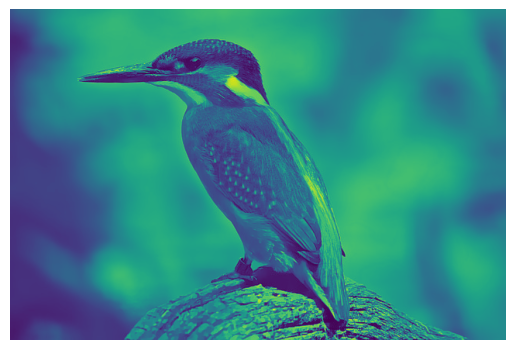

In [22]:
plt.axis('off')
plt.imshow(gray_img)

In [33]:
threshold=128
_,binary=cv2.threshold(gray_img,threshold,255,cv2.THRESH_BINARY)

In [34]:
print(binary.shape)

(427, 640)


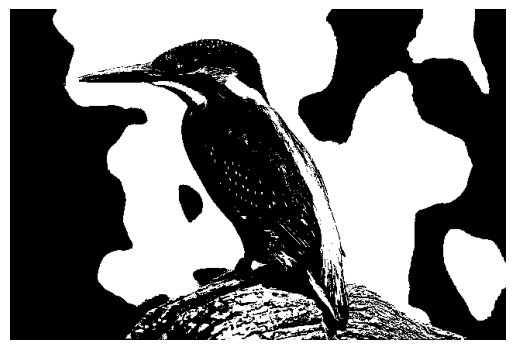

In [38]:
plt.axis('off')
plt.imshow(binary,cmap='gray')
plt.show()

**EDGE DETECTION**

In [40]:
#Sobel Operator
sobel_x = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

In [41]:
#PreWitt Operator
prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewitt_x = cv2.filter2D(gray_img, cv2.CV_64F, prewitt_kernel_x)
prewitt_y = cv2.filter2D(gray_img, cv2.CV_64F, prewitt_kernel_y)
prewitt_edges = np.sqrt(prewitt_x**2 + prewitt_y**2)

In [42]:
#Roberts
roberts_kernel_x = np.array([[1, 0], [0, -1]])

roberts_kernel_y = np.array([[0, 1], [-1, 0]])

roberts_x = cv2.filter2D(gray_img, cv2.CV_64F, roberts_kernel_x)
roberts_y = cv2.filter2D(gray_img, cv2.CV_64F, roberts_kernel_y)
roberts_edges = np.sqrt(roberts_x**2 + roberts_y**2)

In [43]:
#Canny Edge Detector
canny_edges = cv2.Canny(gray_img, 100, 200)

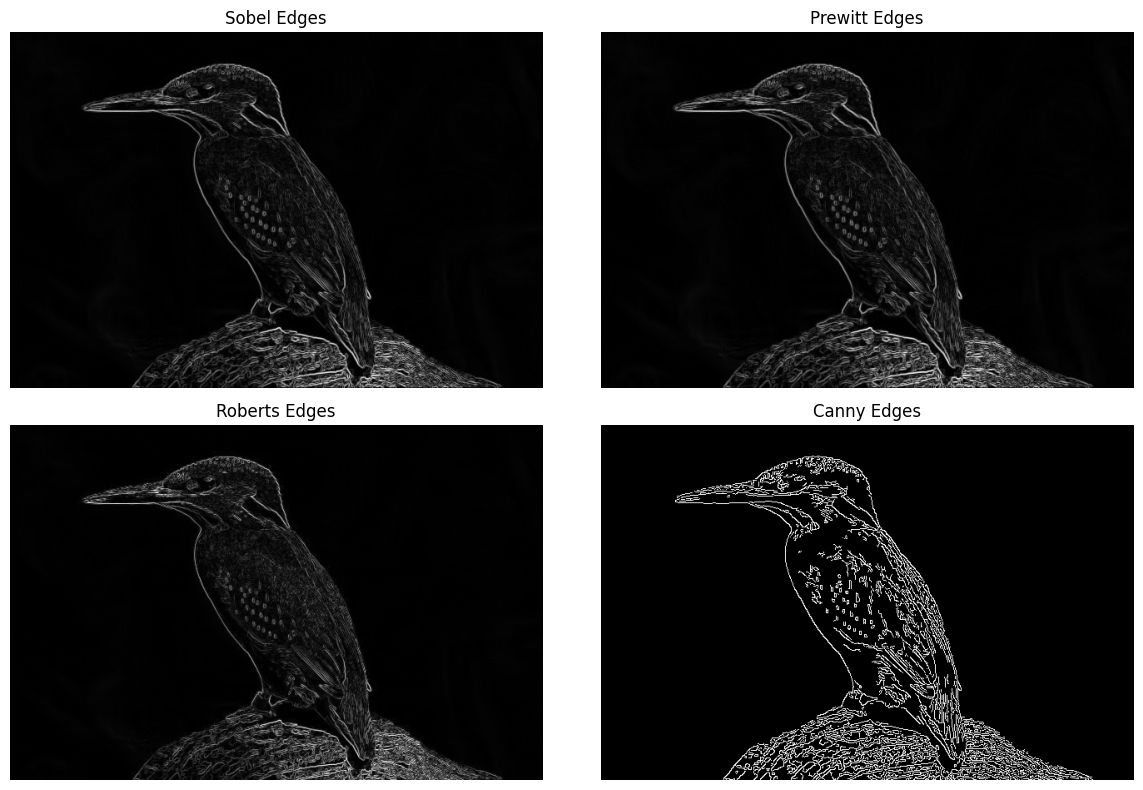

In [44]:
#Displaying the edges
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Sobel Edges')
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Prewitt Edges')
plt.imshow(prewitt_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Roberts Edges')
plt.imshow(roberts_edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Canny Edges')
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

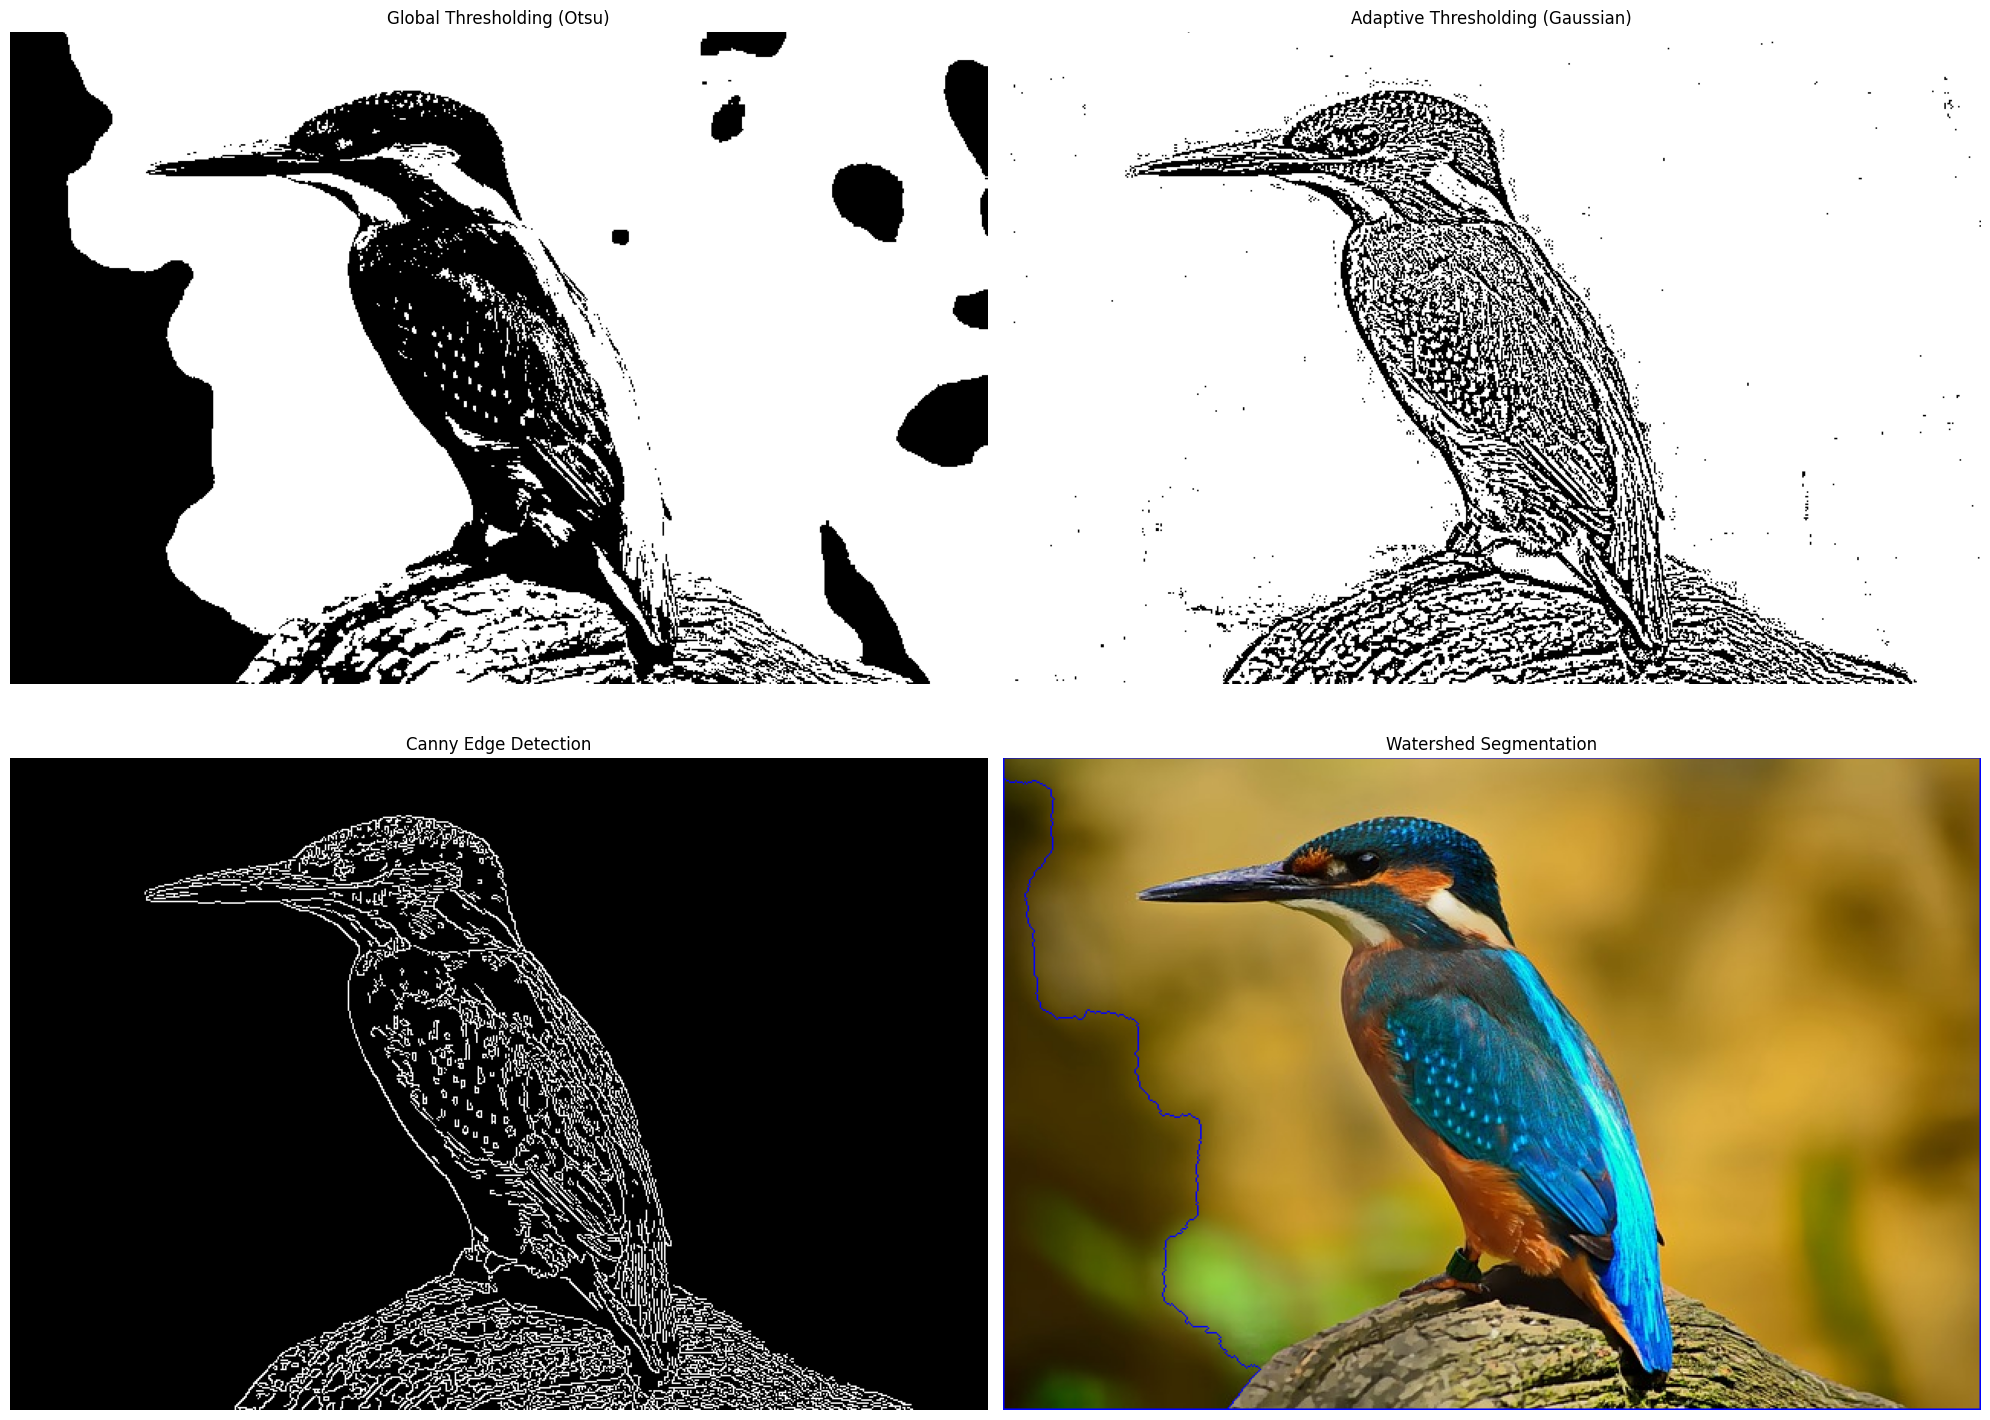

In [46]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Global Thresholding using Otsu's method
ret1, th_global = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Adaptive Thresholding using Gaussian method
th_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

# Canny Edge Detection
# Auto-calculate thresholds using median heuristic
median = np.median(gray)
sigma = 0.33
low = int(max(0, (1 - sigma) * median))
high = int(min(255, (1 + sigma) * median))
edges = cv2.Canny(gray, low, high)

# Region-Based Segmentation (Watershed Algorithm)
# Create a copy of the original image for watershed
img_watershed = image.copy()

#  1: Apply Otsu's thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#  2: Noise removal using morphological opening
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# 3: Extract sure background via dilation
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# 4: Find sure foreground using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# 5: Identify unknown region (subtract sure_fg from sure_bg)
unknown = cv2.subtract(sure_bg, sure_fg)

# 6: Label markers for watershed
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # Background becomes 1
markers[unknown == 255] = 0  # Mark unknown region as 0

# 7: Apply Watershed Algorithm
markers = cv2.watershed(img_watershed, markers)

# Highlight boundaries on the original image
img_watershed[markers == -1] = [255, 0, 0]  # Red boundaries

# Convert BGR to RGB for proper display with Matplotlib
img_watershed_rgb = cv2.cvtColor(img_watershed, cv2.COLOR_BGR2RGB)

# Display all results
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.title('Global Thresholding (Otsu)')
plt.imshow(th_global, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Adaptive Thresholding (Gaussian)')
plt.imshow(th_adaptive, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Watershed Segmentation')
plt.imshow(img_watershed_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()